http://nobutobook.blogspot.jp/2016/03/python-opencv.html

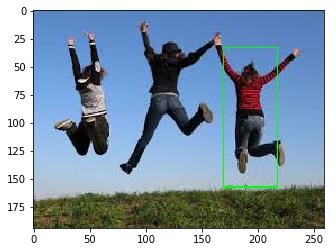

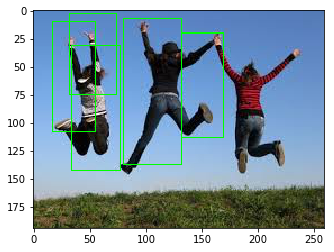

In [37]:
# Pedestrian Detection Default
# use opencv


import cv2
import matplotlib.pyplot as plt

#file = "./Ped001.jpeg"
#file = "./Ped002.jpeg"
file = "./Jamping.jpeg"

# The HOG detector returns slightly larger rectangles than the real objects. 
# So we slightly shrink the rectangles to get a nicer output.
def draw_detections(img, rects, thickness = 1):
    for x, y, w, h in rects:
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv2.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), (0, 255, 0), thickness)

#Default detector (using INRIA Person Dataset)
def PD_default(filename):
#    image = cv2.imread(filename) # read image
    image = plt.imread(filename) # read image
    hog = cv2.HOGDescriptor() # derive HOG features
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) # SVM
    
    # pedestrian detection
    found, w = hog.detectMultiScale(image, hitThreshold=0, winStride=(8,8), padding=(0,0), scale=1.05, finalThreshold=2)
    draw_detections(image, found) # draw rectangles
    
    # write & save image
#    plt.imshow('original',image) # write image
    plt.imshow(image) # write image
    plt.show()
#    cv2.imshow('original',image) # write image
#    cv2.waitKey() # for keyboard binding
    #cv2.imwrite('test2.jpg',im) # save image
    #cv2.destroyAllWindows() # clean up

# run
PD_default(file)

#Daimler detector (using Daimler Pedestrian Detection Benchmark Dataset)
def PD_daimler(filename):
#    image = cv2.imread(filename) # read image
    image = plt.imread(filename) # read image
    hog = cv2.HOGDescriptor((48,96), (16,16), (8,8), (8,8), 9) # derive HOG features
    hog.setSVMDetector(cv2.HOGDescriptor_getDaimlerPeopleDetector()) # SVM
    
    # pedestrian detection
    found, w = hog.detectMultiScale(image, hitThreshold=0, winStride=(8,8), padding=(32,32), scale=1.05, finalThreshold=2)
    draw_detections(image, found) # draw rectangles
    
    # write & save image
    plt.imshow(image) # write image
#    plt.imshow('original',image) # write image
    plt.show()
#    cv2.imshow('original',image) # write image
#    cv2.waitKey() # for keyboard binding
    #cv2.imwrite('test2.jpg',im) # save image
    #cv2.destroyAllWindows() # clean up

#run
PD_daimler(file)